<a href="https://colab.research.google.com/github/gustavohroos/ferramentas-de-ia/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering with Sklearn - Descrição da Tarefa


Baixe os três conjuntos de dados. Cada um deles possui características de atributos distintas. Utilizando técnicas de engenharia de atributos com sklearn (ou outra ferramenta), selecione a menor quantidade de atributos possível em cada um deles, mas sem remover atributos significativos.

## Download Datasets

In [ ]:
!pip install gdown -qqq

In [ ]:
!gdown https://drive.google.com/uc?id=1q_VpqJ8O8JazQez-N6SYTBb51T4QrpMz
!gdown https://drive.google.com/uc?id=1tFcc2B7UfIzy7q3P49EzVxgetdRnbxfc
!gdown https://drive.google.com/uc?id=13fGg8YT844EN3xLgl5UzW1HOsOIbqYPo

Downloading...
From: https://drive.google.com/uc?id=1q_VpqJ8O8JazQez-N6SYTBb51T4QrpMz
To: /content/ia_fe_dataset1.csv
100% 161k/161k [00:00<00:00, 54.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tFcc2B7UfIzy7q3P49EzVxgetdRnbxfc
To: /content/ia_fe_dataset2.csv
100% 1.55M/1.55M [00:00<00:00, 87.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=13fGg8YT844EN3xLgl5UzW1HOsOIbqYPo
To: /content/ia_fe_dataset3.csv
100% 3.08M/3.08M [00:00<00:00, 152MB/s]


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/ia_fe_dataset1.csv')
df2 = pd.read_csv('/content/ia_fe_dataset2.csv')
df3 = pd.read_csv('/content/ia_fe_dataset3.csv')
df1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.092542,-1.585122,-1.585122,-0.186425,-0.909699,0
1,-0.152189,-1.589585,-1.589585,-0.207747,-0.320193,1
2,-2.862124,-2.941878,-2.941878,-1.288126,1.690396,1
3,0.458934,-0.414691,-0.414691,0.120419,0.397453,0
4,0.220629,-0.548184,-0.548184,0.023997,-0.287288,0


# Correlation Selection

## Explanation: https://www.w3schools.com/python/pandas/pandas_correlations.asp
## Reference Guide: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
## Source: https://github.com/pandas-dev/pandas/blob/v2.2.2/pandas/core/frame.py#L10975-L11087


In [ ]:
import numpy as np
import pandas as pd

# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# source https://github.com/pandas-dev/pandas/blob/v2.2.2/pandas/core/frame.py#L10975-L11087

# pd.DataFrame([[1,2,3,4],[3,2,1,0],[7,6,5,4]]).corr()

In [ ]:
df1.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
feature_1,1.000000,0.088525,0.088525,0.985768,-0.002907,-0.662452
feature_2,0.088525,1.000000,1.000000,0.254715,-0.017930,0.012852
feature_3,0.088525,1.000000,1.000000,0.254715,-0.017930,0.012852
feature_4,0.985768,0.254715,0.254715,1.000000,-0.005849,-0.640958
feature_5,-0.002907,-0.017930,-0.017930,-0.005849,1.000000,0.004133
target,-0.662452,0.012852,0.012852,-0.640958,0.004133,1.000000


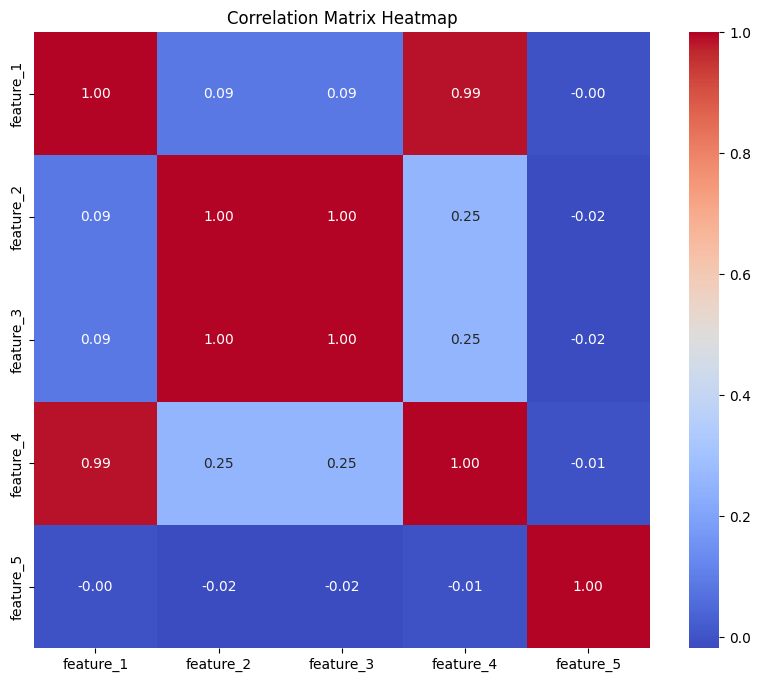

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1_copy = df1.drop(columns='target', axis=1).copy()
corr = df1_copy.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Vou remover a feature 3 pois é igual à feature 2 e a feature 4 pois é altamente correlacionada com a feature 1 (0.99).

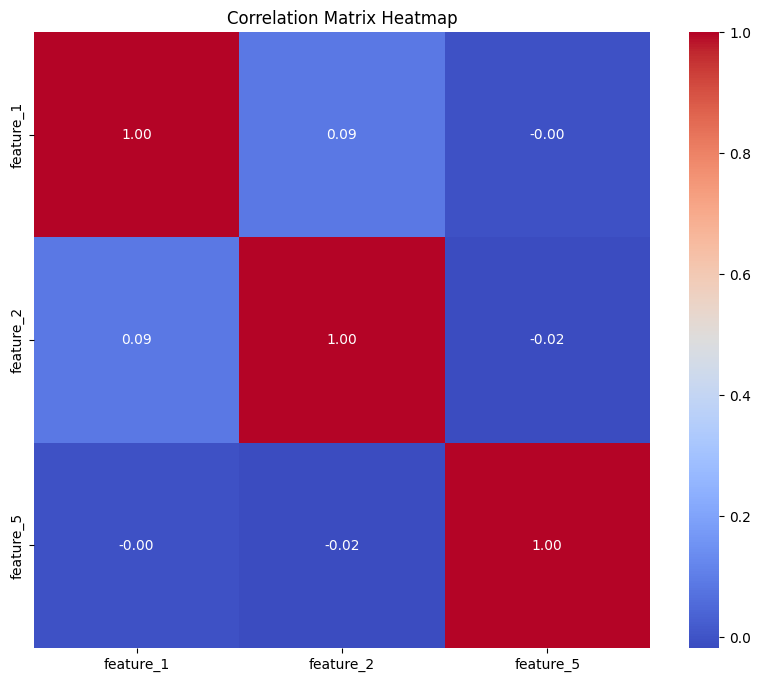

In [ ]:
df1_copy = df1_copy.drop(columns=['feature_3', 'feature_4'] , axis=1).copy()
corr = df1_copy.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


# df2 e df3
Nao deu pra plotar os heatmaps pois sao muitas features, entao utilizei uma regra para dropar colunas altamente correlacionadas.

In [ ]:
df2_copy = df2.drop(columns='target', axis=1).copy()
corr = df2_copy.corr()

high_corr = (corr.abs() > 0.8) & (corr != 1.0)

to_drop = set()


for i in range(len(high_corr)):
    for j in range(i+1, len(high_corr)):
        if high_corr.iloc[i, j]:
            to_drop.add(high_corr.columns[j])


to_drop = list(to_drop)
df_reduced = df2_copy.drop(columns=to_drop)
print(f'Total features before removing: {len(df2_copy.columns)}')
print(f'Total features after removing: {len(df_reduced.columns)}')

Total features before removing: 50
Total features after removing: 21


In [ ]:
df3_copy = df3.drop(columns='target', axis=1).copy()
corr = df3_copy.corr()

to_drop = set()

high_corr = (corr.abs() > 0.8) & (corr != 1.0)

for i in range(len(high_corr)):
    for j in range(i+1, len(high_corr)):
        if high_corr.iloc[i, j]:
            to_drop.add(high_corr.columns[j])


to_drop = list(to_drop)
df_reduced = df3_copy.drop(columns=to_drop)
print(f'Total features before removing: {len(df3_copy.columns)}')
print(f'Total features after removing: {len(df_reduced.columns)}')

Total features before removing: 100
Total features after removing: 90


## Select From Model
Documentation: https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model
Reference guide: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
Source: https://github.com/scikit-learn/scikit-learn/blob/872124551/sklearn/feature_selection/_from_model.py#L93


In [ ]:
X_1 = df1.drop('target', axis=1)
y_1 = df1['target']

X_2 = df2.drop('target', axis=1)
y_2 = df2['target']

X_3 = df3.drop('target', axis=1)
y_3 = df3['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.25, random_state=42)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.25, random_state=42)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.25, random_state=42)

x_train_array = [X_1_train, X_2_train, X_3_train]
y_train_array = [y_1_train, y_2_train, y_3_train]
x_test_array = [X_1_test, X_2_test, X_3_test]
y_test_array = [y_1_test, y_2_test, y_3_test]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(x_train_array, x_test_array, y_train_array, y_test_array), 1):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_t = RandomForestClassifier(n_estimators=100, random_state=42)

    clf.fit(X_train.values, y_train)
    acc_all_features = (clf.predict(X_test.values) == y_test).sum() / y_test.size

    sfm = SelectFromModel(clf, prefit=True)
    X_train_transformed = sfm.transform(X_train.values)
    X_test_transformed = sfm.transform(X_test.values)

    clf_t.fit(X_train_transformed, y_train)
    acc_selected_features = (clf_t.predict(X_test_transformed) == y_test).sum() / y_test.size

    print(f"dataset {i}")
    print(f"total features: {X_train.shape[1]}")
    print(f"selected features: {X_train.shape[1] - sfm.get_support().sum()}")
    print(f"accuracy with all features: {acc_all_features}")
    print(f"accuracy with selected features: {acc_selected_features}\n")


dataset 1
total features: 5
selected features: 3
accuracy with all features: 0.77
accuracy with selected features: 0.765

dataset 2
total features: 50
selected features: 36
accuracy with all features: 0.9725
accuracy with selected features: 0.96

dataset 3
total features: 100
selected features: 68
accuracy with all features: 0.98
accuracy with selected features: 0.9775



# Recursive Feature Elimination
## Documentation: https://scikit-learn.org/stable/modules/feature_selection.html#rfe
## Reference guide: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
## Source: https://github.com/scikit-learn/scikit-learn/blob/872124551/sklearn/feature_selection/_rfe.py#L68

In [ ]:
from sklearn.feature_selection import RFE

# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# source: https://github.com/scikit-learn/scikit-learn/blob/872124551/sklearn/feature_selection/_rfe.py#L68

n_features_to_select = [
    round(len(df1_copy.columns) * 0.75),
    round(len(df2_copy.columns) * 0.75),
    round(len(df3_copy.columns) * 0.75)
]

for i, (X_train, X_test, y_train, y_test, n_select) in enumerate(zip(x_train_array, x_test_array, y_train_array, y_test_array, n_features_to_select), 1):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    clf.fit(X_train, y_train)
    acc_all_features = (clf.predict(X_test) == y_test).sum() / y_test.size

    rfe = RFE(estimator=clf, n_features_to_select=n_select, step=1)
    rfe.fit(X_train, y_train)
    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    clf.fit(X_train_transformed, y_train)
    acc_selected_features = (clf.predict(X_test_transformed) == y_test).sum() / y_test.size

    print(f"dataset {i}")
    print(f"total features: {X_train.shape[1]}")
    print(f"selected features: {n_select}")
    print(f"accuracy with all features: {acc_all_features}")
    print(f"accuracy with selected features: {acc_selected_features}\n")

dataset 1
total features: 5
selected features: 2
accuracy with all features: 0.77
accuracy with selected features: 0.765

dataset 2
total features: 50
selected features: 38
accuracy with all features: 0.9725
accuracy with selected features: 0.97

dataset 3
total features: 100
selected features: 75
accuracy with all features: 0.98
accuracy with selected features: 0.9725



# Sequential Feature Selection

## documentation: https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection
## reference guide: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
## source: https://github.com/scikit-learn/scikit-learn/blob/872124551/sklearn/feature_selection/_sequential.py#L18

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

for i, (X_train, X_test, y_train, y_test, n_select) in enumerate(zip(x_train_array, x_test_array, y_train_array, y_test_array, n_features_to_select), 1):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    clf.fit(X_train, y_train)
    acc_all_features = clf.score(X_test, y_test)

    sfs = SFS(clf, n_features_to_select=n_select, direction='forward')
    sfs.fit(X_train, y_train)

    X_train_transformed = sfs.transform(X_train)
    X_test_transformed = sfs.transform(X_test)

    clf.fit(X_train_transformed, y_train)
    acc_selected_features = clf.score(X_test_transformed, y_test)

    print(f"dataset {i}")
    print(f"total features: {X_train.shape[1]}")
    print(f"selected features: {n_select}")
    print(f"accuracy with all features: {acc_all_features}")
    print(f"accuracy with selected features: {acc_selected_features}\n")

dataset 1
total features: 5
selected features: 2
accuracy with all features: 0.77
accuracy with selected features: 0.7675

dataset 2
total features: 50
selected features: 38
accuracy with all features: 0.9725
accuracy with selected features: 0.965

